# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [13]:
# Set current amount of crypto assets
# Assume the following amount of crypto assets: `1.2` BTC and `5.3` ETH.

my_btc = 1.2
my_eth = 5.3

In [37]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


###Testing response format to see where the required value is placed. Did this for BTC as well.  

eth_response_data



{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115801021,
   'total_supply': 115801021,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3928.11,
     'volume_24h': 66965482299,
     'market_cap': 457297002983,
     'percentage_change_1h': -1.46359911541796,
     'percentage_change_24h': 10.6471691176245,
     'percentage_change_7d': 33.3859865310683,
     'percent_change_1h': -1.46359911541796,
     'percent_change_24h': 10.6471691176245,
     'percent_change_7d': 33.3859865310683},
    'CAD': {'price': 4765.975863,
     'volume_24h': 81249219673.3767,
     'market_cap': 554838453719.274,
     'percent_change_1h': -1.46359911541796,
     'percent_change_24h': 10.6471691176245,
     'percent_change_7d': 33.3859865310683}},
   'last_updated': 1620553108}},
 'metadata': {'timestamp': 1620553108,
  'num_cryptocurrencies': 1303,
  'error': None}}

In [40]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_current_price = btc_response_data['data']['1']['quotes']['USD']['price']

###Question for Claudia - is there an easier was to reference the dictionary or is this the best way? 

print(btc_current_price)

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

eth_current_price = eth_response_data['data']['1027']['quotes']['USD']['price']

print(eth_current_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price

my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


58015.0
3910.96
The current value of your 1.2 BTC is $69618.00
The current value of your 5.3 ETH is $20728.09


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [60]:
# Current amount of shares
# `my_agg` and `my_spy` and set them equal to `200` and `50`, respectively.

my_agg = 200
my_spy = 50

In [182]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


###Test that API credentials have pulled through from .env file and deleted as not best practice to keey API key in print. 



In [48]:
# Format current date as ISO format

today = pd.Timestamp("2021-05-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe,start = today, end = today).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-05-07 00:00:00-04:00  114.85  114.97  114.57  114.645  6812067  419.89   

                                                              
                              high     low   close    volume  
time                                                          
2021-05-07 00:00:00-04:00  422.815  419.16  422.09  58002195

In [52]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.645
Current SPY closing price: $422.09


In [184]:
# Compute the current value of shares

my_spy_value = agg_close_price * my_agg 

my_agg_value = spy_close_price * my_spy 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,929.00
The current value of your 200 AGG shares is $21,104.50


### Savings Health Analysis

In [115]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value+ my_agg_value

value_data = {"": ['crypto','shares'],"amount": [total_crypto, total_shares]}

print(value_data)

df_savings = pd.DataFrame(value_data)

df_savings = df_savings.set_index('')

                                              
                           
df_savings

# Display savings DataFrame
#display(df_savings)

df_savings

{'': ['crypto', 'shares'], 'amount': [90346.088, 44033.5]}


,amount
,
crypto,90346.088
shares,44033.500


<AxesSubplot:title={'center':'Composotion of Personal Savings'}, ylabel='amount'>

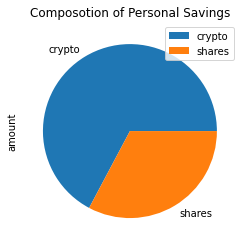

In [116]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composotion of Personal Savings")

In [185]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()
total_savings
# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in this fund!") 
elif total_savings == emergency_fund:
    print(f"Congratulation! You have met you financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund - total_savings):,.2f} away in meeting your goal!")



Congratulations! You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [139]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [156]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(tickers,timeframe,start=start_date,end=end_date,limit=1000).df

### Limit of 1000 restricts pulling 5 years worth of data. API is limited to 1000 only. 
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [149]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data,weights = [.40,.60],num_simulation = 500, num_trading_days = 252 * 30)

In [151]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [152]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001677,0.986883,1.007351,1.003709,0.997821,0.999463,1.018278,1.007748,1.000888,1.002485,...,1.004301,0.996494,1.003084,1.000271,1.008307,1.005574,0.991568,0.998845,1.002586,1.002608
2,1.016198,0.977488,1.001941,1.003825,1.002757,0.994829,1.016723,1.016096,1.002112,1.004711,...,1.012939,0.994747,1.003493,0.998391,1.004750,1.004444,0.998606,1.007735,1.009540,1.004443
3,1.002057,0.983847,1.005001,1.000304,1.001479,0.993423,1.017620,1.004265,1.009726,1.015371,...,1.014967,1.001599,0.990962,0.991569,1.000344,0.997095,1.004772,0.988005,1.004705,1.005233
4,1.008317,0.989772,1.008672,0.997954,1.002041,1.001954,1.026520,0.997718,1.014605,1.011720,...,1.030081,1.010501,0.988002,0.991149,1.005409,0.996122,1.012756,0.993124,0.997210,1.004869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.188634,3.370560,11.651436,14.135147,7.636409,9.995613,11.330231,6.379560,7.447376,4.714162,...,11.967035,2.090300,10.938091,7.030444,9.160923,13.835032,6.080536,8.284870,2.722471,9.816308
7557,17.085194,3.386005,11.723322,14.184351,7.624770,10.097060,11.201902,6.435927,7.460622,4.666028,...,11.957065,2.087658,11.046985,7.104894,9.181794,13.956033,6.111885,8.374971,2.699083,9.716024
7558,16.897527,3.392509,11.587564,14.234740,7.610611,10.124320,11.298096,6.403003,7.429057,4.679808,...,11.989502,2.083072,11.016755,7.110317,9.096879,14.066874,6.111483,8.395928,2.722774,9.665535
7559,16.729367,3.366850,11.610693,14.352563,7.566249,10.262757,11.238182,6.405788,7.327174,4.753259,...,12.049831,2.081340,11.210945,7.150214,9.027299,14.126008,6.139997,8.325122,2.731046,9.654171


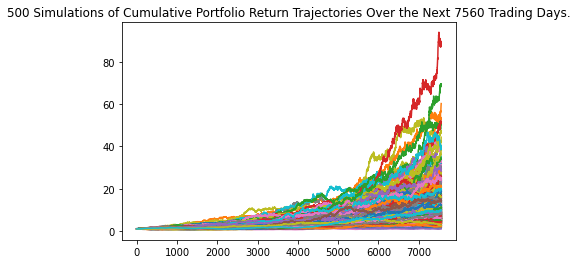

In [157]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

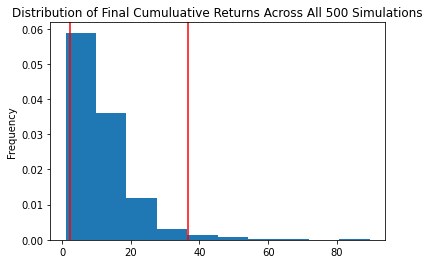

In [158]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()


### Retirement Analysis

In [159]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             11.959929
std               9.451025
min               0.989588
25%               6.135013
50%               9.369789
75%              14.494579
max              89.634896
95% CI Lower      2.418622
95% CI Upper     36.666431
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [161]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48372.44 and $733328.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [186]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(even_tbl[8]*initial_investment_2,2)
ci_upper_2 = round(even_tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2:,.2f} and ${ci_upper_2:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $72,558.65 and $1,099,992.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [164]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5 = MCSimulation(portfolio_data = df_stock_data,weights = [.40,.60],num_simulation = 500, num_trading_days = 252 * 5)

In [165]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005863,1.004779,0.988221,1.008482,0.988772,1.014310,0.992757,0.995144,1.005800,1.002464,...,0.982252,0.996700,0.998977,1.002841,1.006883,1.008229,0.992387,0.999108,0.994245,1.004855
2,1.010223,1.007884,0.989243,1.003085,0.989670,1.008971,0.983327,0.993298,1.001950,1.016195,...,0.977870,0.996999,1.002113,1.014057,1.001531,1.016610,0.981125,1.011352,1.003809,1.007769
3,1.021022,1.015066,0.982382,1.004667,0.991328,1.018488,0.988144,0.992162,1.000809,1.011076,...,0.980542,0.992744,0.999407,1.033231,1.013976,1.005363,0.990597,1.012687,0.998267,1.013984
4,1.025737,1.021641,0.976426,1.010426,0.985436,1.030496,0.989421,0.987592,1.001823,1.014932,...,0.967275,0.999941,1.007853,1.025383,1.009447,1.001009,0.985905,1.014064,0.996644,1.010463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.920774,1.277950,1.320293,1.502925,1.857883,1.016319,1.162665,1.792553,1.333537,1.236378,...,0.952657,1.946927,1.302060,1.437275,1.817647,1.011090,1.107355,1.988070,1.180323,2.335711
1257,0.916954,1.268825,1.332983,1.505306,1.858923,1.008268,1.157324,1.809421,1.321798,1.249264,...,0.959255,1.938808,1.307092,1.434863,1.830106,1.005036,1.108044,1.986067,1.181571,2.323376
1258,0.923195,1.298494,1.339594,1.502249,1.872498,0.999020,1.174597,1.806946,1.330430,1.236114,...,0.958509,1.919573,1.304495,1.426796,1.814125,1.009565,1.115563,1.970158,1.182903,2.323064
1259,0.925372,1.299136,1.335817,1.499986,1.862519,0.984394,1.169472,1.803606,1.339991,1.224097,...,0.960667,1.910375,1.302573,1.414723,1.811827,1.005885,1.115174,1.975043,1.190937,2.310457


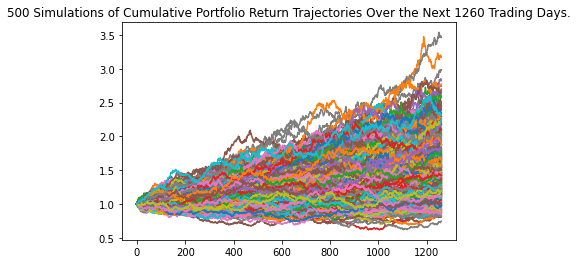

In [166]:
# Plot simulation outcomes
line_plot_5 = MC_even_dist_5.plot_simulation()

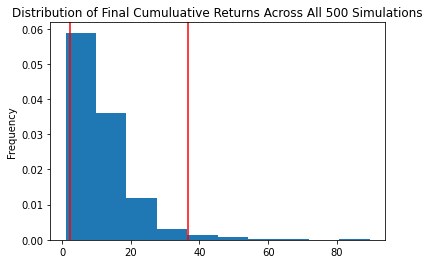

In [168]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [169]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5 = MC_even_dist_5.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5)


count           500.000000
mean              1.508177
std               0.427600
min               0.744497
25%               1.206984
50%               1.433690
75%               1.737225
max               3.464802
95% CI Lower      0.884955
95% CI Upper      2.495671
Name: 1260, dtype: float64


In [187]:
# Set initial investment

initial_investment_5 = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_5 = round(even_tbl_5[8]*initial_investment_3,2)
ci_upper_5 = round(even_tbl_5[9]*initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5:,.2f} and ${ci_upper_5:,.2f}")



There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 5 years will end within in the range of $17,699.09 and $49,913.43


### Ten Years Retirement Option

In [174]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10 = MCSimulation(portfolio_data = df_stock_data,weights = [.40,.60],num_simulation = 500, num_trading_days = 252 * 10)

In [175]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016270,1.002508,0.999997,0.999610,1.015500,1.008593,0.993285,1.000506,1.009914,1.001417,...,0.993685,0.993366,1.014350,0.998104,1.015532,0.991877,0.991933,0.999810,0.999117,0.990610
2,1.016437,1.003207,1.010119,0.996398,1.008094,1.004534,0.992881,1.011578,1.016123,0.994544,...,1.001383,0.986783,1.016202,0.995307,1.015652,1.007820,0.980511,1.002418,1.008161,0.994005
3,1.016983,0.987535,1.016054,1.002152,1.007703,1.004377,0.991394,1.005751,1.006798,1.003395,...,1.008247,0.981819,1.030930,0.987931,1.026476,1.016561,0.980496,1.015800,1.015759,0.994337
4,1.025176,0.969774,1.027239,1.000702,1.003381,1.007644,0.990745,1.009092,0.988800,0.994031,...,1.002067,0.973016,1.025641,0.990468,1.028934,1.008270,0.973850,1.015579,1.027072,0.998819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.426952,2.614922,2.133043,1.716789,1.141245,0.890373,1.053346,2.089194,1.193945,4.539316,...,2.827049,2.351932,4.179227,3.064768,1.375517,2.578037,1.127635,1.737903,1.431257,3.392946
2517,1.445849,2.600955,2.147829,1.738140,1.143493,0.901012,1.049870,2.085555,1.212720,4.531649,...,2.813896,2.345885,4.151023,3.097041,1.388624,2.553004,1.119297,1.735227,1.427451,3.383758
2518,1.451312,2.584248,2.146615,1.719162,1.146144,0.897544,1.057688,2.104552,1.208209,4.604510,...,2.777121,2.348684,4.145892,3.070224,1.378145,2.527732,1.134139,1.718209,1.435740,3.396125
2519,1.449189,2.610615,2.158130,1.714877,1.149398,0.884232,1.060825,2.091933,1.190083,4.562724,...,2.789433,2.339805,4.107816,3.090662,1.372624,2.534187,1.140331,1.727766,1.441858,3.446846


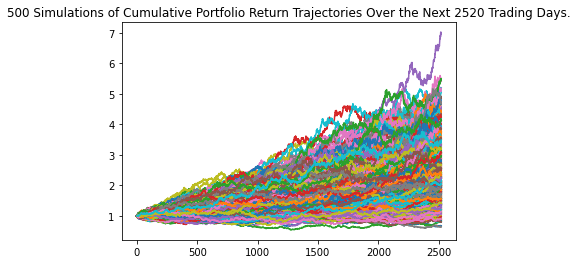

In [176]:
# Plot simulation outcomes

line_plot_10 = MC_even_dist_10.plot_simulation()

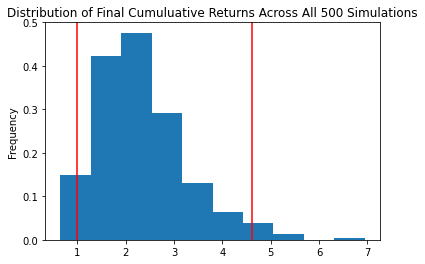

In [177]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_even_dist_10.plot_distribution()

In [178]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10 = MC_even_dist_10.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10)


count           500.000000
mean              2.316964
std               0.923252
min               0.646717
25%               1.677505
50%               2.117090
75%               2.803033
max               6.946447
95% CI Lower      0.984071
95% CI Upper      4.609314
Name: 2520, dtype: float64


In [188]:
# Set initial investment

initial_investment_10 = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_10 = round(even_tbl_10[8]*initial_investment_3,2)
ci_upper_10 = round(even_tbl_10[9]*initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10:,.2f} and ${ci_upper_10:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 10 years will end within in the range of $19,681.42 and $92,186.29
